In [1]:
import pandas as pd
import matplotlib.pyplot as plt

detailed_data = pd.read_csv('NVDA_weekly_return_detailed.csv')
detailed_data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility
0,48.945000,49.875000,48.625000,49.837502,49.317123,35561600,0.000,2018-01-02,0,2018,2,Tuesday,1.98875,3.081352
1,51.025002,53.424999,50.937500,53.117500,52.562889,91470400,6.581,2018-01-03,0,2018,3,Wednesday,1.98875,3.081352
2,53.939999,54.512501,53.172501,53.397499,52.839947,58326800,0.527,2018-01-04,0,2018,4,Thursday,1.98875,3.081352
3,53.547501,54.227501,52.770000,53.849998,53.287727,58012400,0.847,2018-01-05,0,2018,5,Friday,1.98875,3.081352
4,55.099998,56.250000,54.645000,55.500000,54.920506,88121600,3.064,2018-01-08,1,2018,8,Monday,0.70180,1.397675


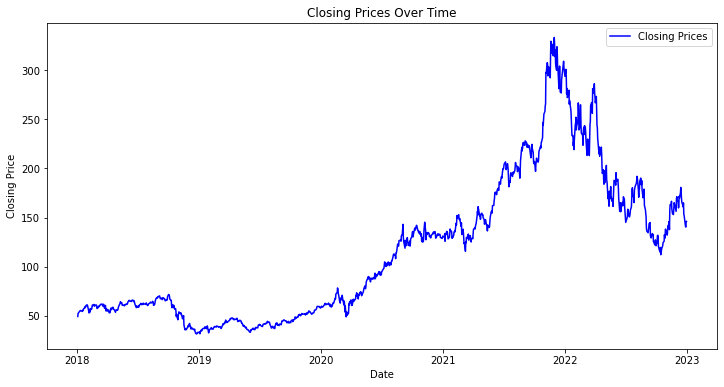

In [2]:
detailed_data['Date'] = pd.to_datetime(detailed_data['Date'])

# Set 'Date' column as the index
detailed_data.set_index('Date', inplace=True)

# Plot Closing Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(detailed_data['Adj Close'], label='Closing Prices', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



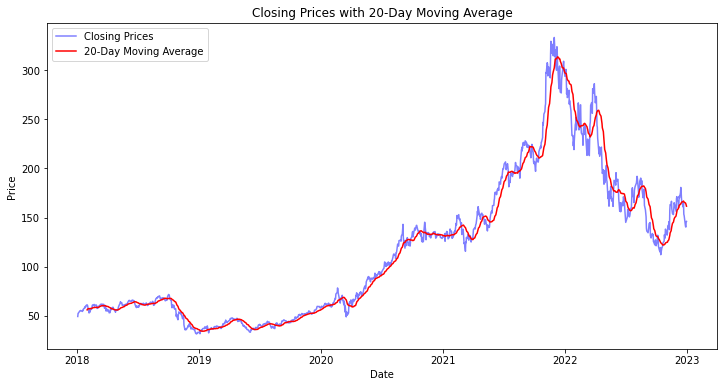

In [3]:
# Use Moving Averages to Smooth Out Fluctuations
# Assuming a 20-day moving average
import seaborn as sns
rolling_average = detailed_data['Adj Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=detailed_data.index, y=detailed_data['Adj Close'], label='Closing Prices', color='blue', alpha=0.5)
sns.lineplot(x=detailed_data.index, y=rolling_average, label='20-Day Moving Average', color='red')
plt.title('Closing Prices with 20-Day Moving Average')
plt.title('Closing Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

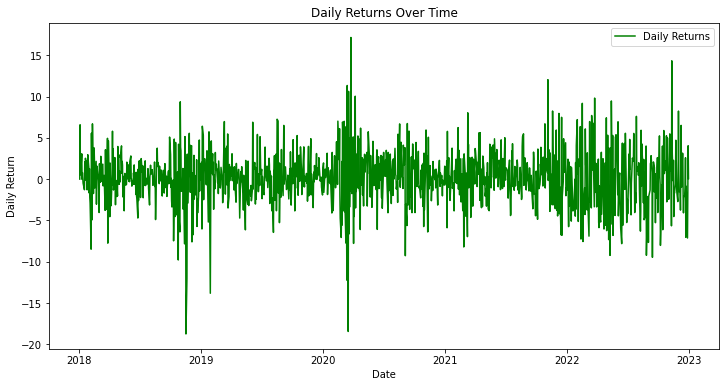

In [4]:
# Visualize Daily Returns using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=detailed_data.index, y=detailed_data['Return'], label='Daily Returns', color='green')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


Best year & week to be invested in: 
             Year  Week_Number  mean_return
Date                                      
2020-03-25  2020           12       4.4156


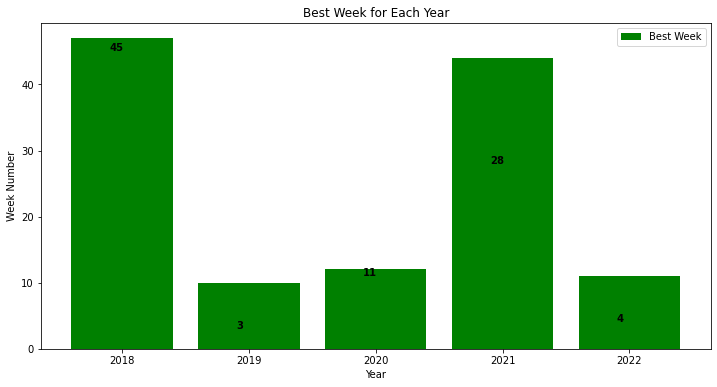

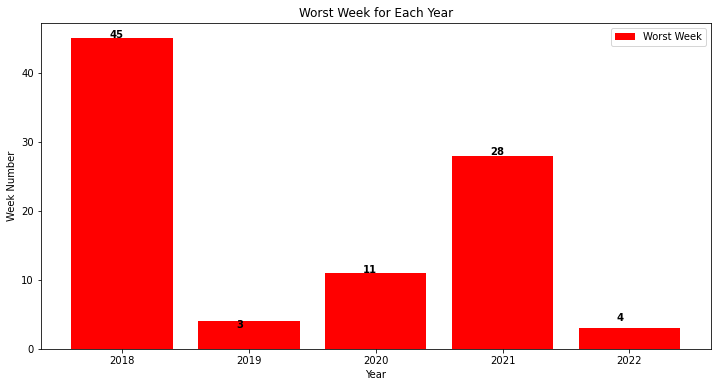

In [5]:

# Sort the data by mean_return in ascending order to find the best weeks
best_weeks = detailed_data.sort_values(by='mean_return', ascending=False)

# Sort the data by mean_return in descending order to find the worst weeks
worst_weeks = detailed_data.sort_values(by='mean_return', ascending=True)

# Display the top N best and worst weeks
N = 1  # Selecting the top week for each year
best_weeks_top_N = best_weeks.groupby('Year').head(N)
worst_weeks_top_N = worst_weeks.groupby('Year').head(N)
print("Best year & week to be invested in: \n", best_weeks.head(N)[['Year', 'Week_Number', 'mean_return']])
# Plotting the best week for each year
plt.figure(figsize=(12, 6))
plt.bar(best_weeks_top_N['Year'], best_weeks_top_N['Week_Number'], color='green', label='Best Week')
for i, v in enumerate(worst_weeks_top_N['Week_Number']):
    plt.text(i + 2018 - 0.1, v + 0.1 , str(v), color='black', fontweight='bold')
plt.title('Best Week for Each Year')
plt.xlabel('Year')
plt.ylabel('Week Number')
plt.legend()
plt.show()

# Plotting the worst week for each year
plt.figure(figsize=(12, 6))
plt.bar(worst_weeks_top_N['Year'], worst_weeks_top_N['Week_Number'], color='red', label='Worst Week')
for i, v in enumerate(worst_weeks_top_N['Week_Number']):
    plt.text(i + 2018 - 0.1, v + 0.1 , str(v), color='black', fontweight='bold')
plt.title('Worst Week for Each Year')
plt.xlabel('Year')
plt.ylabel('Week Number')
plt.legend()
#plt.grid(True)
plt.show()

In [6]:
weekly_data = pd.read_csv("NVDA_weekly_return_volatility.csv")
weekly_data.head()

,Year,Week_Number,mean_return,volatility
0,2018,0,1.98875,3.081352
1,2018,1,0.70180,1.397675
2,2018,2,0.80200,1.813348
3,2018,3,1.13480,1.691356
4,2018,4,-0.80300,2.021694


In [7]:
#Week Labeling
# Set the color label to 'red' by default
'''
1. If the mean return for the week is positive, label it as "green."
#2. If the volatility for the week is below a certain threshold (e.g., 1.0), label it as "green" (indicating stability).
3. If the current week's mean return is higher, label it as "green"; otherwise, label it as "red."
'''
weekly_data['color_label'] = 'red'

#volatility_threshold = 1

# Apply the combined condition for rows other than the first
#condition = (weekly_data['mean_return'] > 0) & (weekly_data['volatility'] < volatility_threshold) & (weekly_data['mean_return'] > weekly_data['mean_return'].shift(1))
condition = (weekly_data['mean_return'] > 0) & (weekly_data['mean_return'] > weekly_data['mean_return'].shift(1))
weekly_data.loc[condition, 'color_label'] = 'green'

weekly_data.head()

,Year,Week_Number,mean_return,volatility,color_label
0,2018,0,1.98875,3.081352,red
1,2018,1,0.70180,1.397675,red
2,2018,2,0.80200,1.813348,green
3,2018,3,1.13480,1.691356,green
4,2018,4,-0.80300,2.021694,red


In [8]:
print('red labels =', (weekly_data['color_label'] == 'red').sum())
print('Total rows =', len(weekly_data))
print('volatility mean = ',weekly_data['volatility'].mean())
print('green labels = ',(weekly_data['color_label'] == 'green').sum())

red labels = 160
Total rows = 263
volatility mean =  2.8833696267088325
green labels =  103


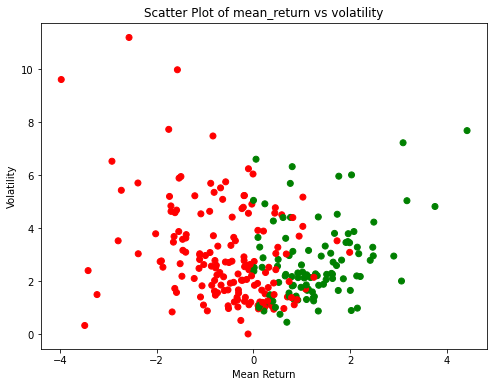

In [9]:
#plot of mean return vs volatility
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(8, 6))
colors = weekly_data['color_label'].map({'red': 'red', 'green': 'green'})
plt.scatter(weekly_data['mean_return'], weekly_data['volatility'], c=colors, label=weekly_data['color_label'])

# Set plot labels
plt.title('Scatter Plot of mean_return vs volatility')
plt.xlabel('Mean Return')
plt.ylabel('Volatility')

# Show legend
#plt.legend()

# Display the plot
plt.show()


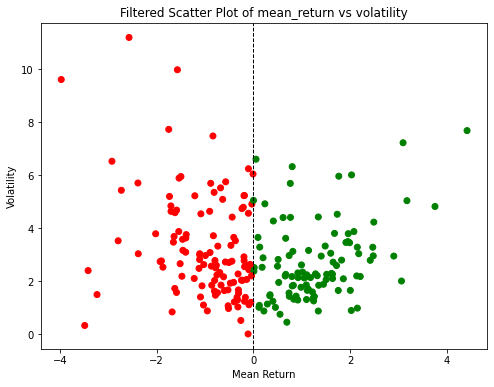

In [10]:
#Creating a line of separation between red and green points. This is only for reference
filtered_weekly_data = weekly_data[(weekly_data['color_label'] == 'red') & (weekly_data['mean_return'] <= 0) |
                 (weekly_data['color_label'] == 'green') & (weekly_data['mean_return'] >= 0)]

# Scatter plot
plt.figure(figsize=(8, 6))
colors = filtered_weekly_data['color_label'].map({'red': 'red', 'green': 'green'})
plt.scatter(filtered_weekly_data['mean_return'], filtered_weekly_data['volatility'], c=colors, label=filtered_weekly_data['color_label'])
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
# Set plot labels
plt.title('Filtered Scatter Plot of mean_return vs volatility')
plt.xlabel('Mean Return')
plt.ylabel('Volatility')

plt.show()

In [11]:
#combining two datasets for further analysis
daily_open = detailed_data.groupby(['Year', 'Week_Number'])['Open'].first().reset_index()
daily_close = detailed_data.groupby(['Year', 'Week_Number'])['Adj Close'].last().reset_index()
weekly_data = weekly_data.merge(daily_open, on=['Year', 'Week_Number'], suffixes=('', '_Open'))
weekly_data = weekly_data.merge(daily_close, on=['Year', 'Week_Number'], suffixes=('', '_Adj Close'))


NVDA_data = weekly_data.copy()
NVDA_data = NVDA_data[['Year', 'Week_Number', 'Open', 'Adj Close', 'mean_return', 'volatility', 'color_label']]

NVDA_data.head()

,Year,Week_Number,Open,Adj Close,mean_return,volatility,color_label
0,2018,0,48.945000,53.287727,1.98875,3.081352,red
1,2018,1,55.099998,55.162941,0.70180,1.397675,red
2,2018,2,56.012501,56.926830,0.80200,1.813348,green
3,2018,3,57.607498,60.197319,1.13480,1.691356,green
4,2018,4,60.685001,57.770416,-0.80300,2.021694,red


In [13]:
from stock_analysis_log_reg import test_accuracy as test_accuracy_lr
from stock_knn import test_accuracy as test_accuracy_knn
from stock_svm import accuracy_linear_svm
from stock_decision_tree import accuracy_dt
from stock_rf import accuracy_rf

# Create a table
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy"]
table.add_row(["Logistic Regression", f"{(test_accuracy_lr * 100):.2f}"])
table.add_row(["k-Nearest Neighbors (kNN)", f"{(test_accuracy_knn * 100):.2f}"])
table.add_row(["Linear SVM", f"{(accuracy_linear_svm * 100):.2f}"])
table.add_row(["Decision Tree", f"{(accuracy_dt * 100):.2f}"])
table.add_row(["Random Forest", f"{(accuracy_rf * 100):.2f}"])

# Print the table
print(table)

+---------------------------+----------+
|         Algorithm         | Accuracy |
+---------------------------+----------+
|    Logistic Regression    |  84.62   |
| k-Nearest Neighbors (kNN) |  76.92   |
|         Linear SVM        |  84.62   |
|       Decision Tree       |  88.46   |
|       Random Forest       |  86.54   |
+---------------------------+----------+


# Trading strategy for 2022 to calculate the amount at the end of the year using true labels

In [14]:
NVDA_data = pd.read_csv('NVDA_data.csv')

train_data = NVDA_data[NVDA_data['Year'] != 2022].copy()
test_data = NVDA_data[NVDA_data['Year'] == 2022].copy()


def stock_investment_strategy(df, initial_balance=100):
    df = df.reset_index(drop=True)  # Reset the index to numeric values
    balance = initial_balance
    position = None
    balance_history = []

    for week in range(len(df)):  # Adjust the loop condition
        open_price = df.loc[week, 'Open']
        close_price = df.loc[week, 'Adj Close']

        if df.loc[week, 'color_label'] == 'green':
            if position is None:
                shares_to_buy = balance / open_price
                print(f"Week {week}: Buying {shares_to_buy:.2f} shares at ${open_price:.2f}")
                position = shares_to_buy
                balance = 0
                print(f"   Shares: {position:.2f}, Portfolio Value: ${balance:.2f}")

        elif df.loc[week, 'color_label'] == 'red':
            if position is not None:
                balance_from_selling = position * df.loc[week - 1, 'Adj Close']
                print(f"Week {week}: Selling {position:.2f} shares at ${df.loc[week - 1, 'Adj Close']:.2f}, "
                      f"Portfolio Value: ${balance_from_selling:.2f}")
                balance += balance_from_selling
                position = None
                print(f"   Portfolio Value: ${balance:.2f}")

        if position is None:
            portfolio_value = balance
        else:
            portfolio_value = position * df.loc[week - 1, 'Adj Close']

        balance_history.append(portfolio_value)
        print(f"Week {week}: Portfolio Value: ${portfolio_value:.2f}")

    return balance_history

resulting_balance_history = stock_investment_strategy(test_data)
print("Balance History based on Modified Predicted Labels for 2022:", resulting_balance_history[-1])


Week 0: Portfolio Value: $100.00
Week 1: Portfolio Value: $100.00
Week 2: Portfolio Value: $100.00
Week 3: Portfolio Value: $100.00
Week 4: Buying 0.43 shares at $231.82
   Shares: 0.43, Portfolio Value: $0.00
Week 4: Portfolio Value: $98.40
Week 5: Selling 0.43 shares at $242.88, Portfolio Value: $104.77
   Portfolio Value: $104.77
Week 5: Portfolio Value: $104.77
Week 6: Portfolio Value: $104.77
Week 7: Buying 0.45 shares at $230.35
   Shares: 0.45, Portfolio Value: $0.00
Week 7: Portfolio Value: $107.39
Week 8: Selling 0.45 shares at $241.26, Portfolio Value: $109.73
   Portfolio Value: $109.73
Week 8: Portfolio Value: $109.73
Week 9: Portfolio Value: $109.73
Week 10: Buying 0.50 shares at $218.69
   Shares: 0.50, Portfolio Value: $0.00
Week 10: Portfolio Value: $110.77
Week 11: Selling 0.50 shares at $264.23, Portfolio Value: $132.58
   Portfolio Value: $132.58
Week 11: Portfolio Value: $132.58
Week 12: Portfolio Value: $132.58
Week 13: Portfolio Value: $132.58
Week 14: Portfolio V

In [15]:
def buy_and_hold_strategy(data, initial_investment):
    cash = initial_investment
    shares = 0

    # Buy on the first trading day
    shares = cash / data['Open'].iloc[0]
    cash = 0

    # Sell on the last trading day
    final_portfolio_value = shares * data['Adj Close'].iloc[-1]

    return final_portfolio_value

initial_investment = 100
final_portfolio_value_buy_and_hold = buy_and_hold_strategy(test_data, initial_investment)
print("Final Portfolio Value based on Buy-and-Hold Strategy for 2022:", final_portfolio_value_buy_and_hold)


Final Portfolio Value based on Buy-and-Hold Strategy for 2022: 48.99816566986828
